Nathan Deinlein <br>
Ryan Kinney <br>
Chris Roche <br>
Cameron Stewart <br>

# Machine Learning 1 - Project 1

## Section 1: Business Understanding 

For our lab report, our team decided to select a horse racing dataset where racing data was collected between 1997 and 2005 on Hong Kong’s two racetracks. This data was collected and posted on Kaggle (https://www.kaggle.com/gdaley/hkracing?select=runs.csv) with the goal of searching for information that can be used to generate profit when bets are placed on the horses competing. With a thorough analysis, a data scientist can gain an advantage over other horse betters.

Within the dataset called “runs”, there is a response variable labeled “won”. This is a binary feature which shows whether each unique horse in a race won or did not win. Using a logistic regression model with our response being the “won” feature is a good way to be able to predict the outcomes of future horse races. This is especially useful when it comes to horse betting or gambling in general due to the fact that the odds of winning is a common metric used in the gambling industry. We can evaluate our logistic regression model with an accuracy score, sensitivity score, specificity score, or using AIC to compare competing models.

However, in horse betting, betters have the option to place three kinds of bets. This includes betting on who will win (a win bet), betting on who will place first or second (a place bet), or betting on who will place first, second, or third (a show bet) (https://www.rgj.com/story/sports/2014/05/16/just-horse-betting-work/2212724/). 

Luckily, this dataset includes another feature labeled “results” where the individual place of each unique horse in a race is recorded. With this feature, we can use an MLR model to predict the place of a horse and calculate metrics such as MSE and R2 to evaluate our predictions. Another option that could be useful for show betters is to transform the results feature into a binary feature where we count places first, second, and third as a win, and all other places as a loss. From there we can model using logistic regression using the same metrics as our logistic regression model using the “won” feature as our response.

## Section 2: Data Meaning Type 

The Horse Racing From Hong Kock dataset provided by Kaggle contains two datasets. The first is the “runs” dataset which contains 79,447 observations and 37 features. These features describe various aspects of a horse and its performance in a given race. Each observation in the runs dataset includes a race_id. Kaggle provides a second “races” dataset which race_id corresponds to. This provides information on the specific track and race such as surface condition, length, and prize. For this stage in our Exploratory Data Analysis, we focused on the “runs” dataset and did not pull in the “races” data. Potential uses for the “races” dataset as well as other possible data will be discussed in Section 8: New Features.

There are several key continuous features contained in the runs data set:
- Result: the position the horse finished in. Integer values ranging from 1 - 14
- Lengths_beyond: a floating point value indicating how far the horse completed behind the leader. The winning horse will have a lengths_behind of zero.
- Declared_weight: floating point value for the weight of the horse, the jockey, and the equipment in pounds.
- Actual_weight: floating point value for the weight the horse carried; i.e. the weight of the Jockey and equipment
- Win_odds: floating point value for the odds of the horse to win the race
- Place_odds: floating point value for the odds of the horse to place in 1st, 2nd, or 3rd

Several key categorical features contained in the data set:
- Won: a boolean value where 1 indicates the horse won the race and 0 indicates the horse did not. A horse with a Result of 1 will have a Won of 1. All others will have a Won of zero.
- Horse_country: a country code for the country of origin for the horse. Examples are NZ, AUS, USA
- Horse_type: examples are gelding, mare, rig
- Horse_age: all horses in the data set are 2, 3, 4, 5, 6, 7, 8, 9, or 10 years old at the time of race. The average age of horses in the dataset is 3.3 years

Each observation contains 18 features related to the horse's performance at a given section of the race. These can be broadly categorised into three types:
- Time: the time in seconds for the horse to pass through a given section of the race
- Behind_sec: the number of lengths behind the leader for a given section of the race
- Position_sec: the horse's position for a given section of the race

The dataset contains features for six sections. Not all race tracks are the same size, therefore not all observations have entries for all six sections. However, all observations have data for at least three sections. More detail on missing track section data is discussed in Section 3: Data Quality.

In [1]:
# Load libraries
import numpy as np
import pandas as pd

# read in the data
url = "https://raw.githubusercontent.com/nedeinlein/Machine_Learning_I/main/runs.csv"
runs_df = pd.read_csv(url, index_col=0)

In [2]:
# Summary statistics of each feature
runs_df.info()
runs_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 6348
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horse_no         79447 non-null  int64  
 1   horse_id         79447 non-null  int64  
 2   result           79447 non-null  int64  
 3   won              79447 non-null  float64
 4   lengths_behind   79447 non-null  float64
 5   horse_age        79447 non-null  int64  
 6   horse_country    79445 non-null  object 
 7   horse_type       79445 non-null  object 
 8   horse_rating     79447 non-null  int64  
 9   horse_gear       79447 non-null  object 
 10  declared_weight  79447 non-null  float64
 11  actual_weight    79447 non-null  int64  
 12  draw             79447 non-null  int64  
 13  position_sec1    79447 non-null  int64  
 14  position_sec2    79447 non-null  int64  
 15  position_sec3    79447 non-null  int64  
 16  position_sec4    46226 non-null  float64
 17  position_sec5

,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,draw,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,...,79447.000000,79447.000000,46226.000000,10079.000000,1296.000000,79447.000000,79447.000000,75712.000000,79447.000000,79447.000000
mean,6.905623,2204.410525,6.838597,0.080053,6.108901,3.339346,61.034904,1104.953568,122.729656,6.876005,...,22.928985,23.864054,24.039662,24.105221,24.350216,85.322914,28.812977,7.423177,79.793007,85.832341
std,3.760711,1275.049375,3.730498,0.271378,33.636209,0.876763,11.748788,62.347597,6.305496,3.747589,...,3.599727,3.571163,4.663367,1.127963,1.314755,18.512883,30.097375,8.823430,45.118874,54.338105
min,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,1.000000,...,19.990000,21.000000,21.200000,21.420000,21.500000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,4.000000,...,22.290000,23.230000,23.320000,23.410000,23.570000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,...,22.870000,23.760000,23.890000,23.960000,24.120000,83.350000,15.000000,4.100000,75.000000,76.000000
75%,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,10.000000,...,23.520000,24.410000,24.560000,24.630000,24.820000,100.780000,38.000000,8.600000,118.000000,138.000000
max,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,15.000000,...,999.000000,999.000000,999.000000,49.570000,34.150000,163.580000,99.000000,101.000000,175.000000,185.000000


## Section 3: Data Quality

Before cleaning, the races dataset contains 545,959 missing values. These are contained within 12 out of 37 columns.

The table below shows the percent missing values by feature:

In [3]:
# List percent of null entries per feature
runs_df.isna().sum() # missing values by column
runs_df.isna().sum().sum() # total missing values
runs_df.isna().sum() * 100 / len(runs_df) # percent missing values by column

horse_no            0.000000
horse_id            0.000000
result              0.000000
won                 0.000000
lengths_behind      0.000000
horse_age           0.000000
horse_country       0.002517
horse_type          0.002517
horse_rating        0.000000
horse_gear          0.000000
declared_weight     0.000000
actual_weight       0.000000
draw                0.000000
position_sec1       0.000000
position_sec2       0.000000
position_sec3       0.000000
position_sec4      41.815298
position_sec5      87.313555
position_sec6      98.368724
behind_sec1         0.000000
behind_sec2         0.000000
behind_sec3         0.000000
behind_sec4        41.815298
behind_sec5        87.313555
behind_sec6        98.368724
time1               0.000000
time2               0.000000
time3               0.000000
time4              41.815298
time5              87.313555
time6              98.368724
finish_time         0.000000
win_odds            0.000000
place_odds          4.701247
trainer_id    

The missing values fall into three types:
- In race performance: sections 1 - 6 as discussed in Section 2
- Horse data: country, type
- Pre-race odds

The majority of missing data is for race sections 4 - 6. This is because not all tracks are the same size. For the purposes of this EDA, we eliminated the features for track sections 4, 5, and 6. This has the result of effectively trimming our dataset to tracks of the same size (i.e. 3 sections). In the future, instead of simply eliminating the features we could split the data set into multiple and create separate models for tracks that have 3, 4, 5, or 6 sections.

There were only two observations missing horse country and type so those observations were removed from the dataset. This brought total observations to 79,445.

Place_odds was missing 4.7% of observations. For this initial EDA, we imputed the missing place_odds values by using the mean place_odds for the non-missing values. Upon closer inspection of the correlation of features within the data we found a strong correlation between win_odds and place_odds which intuitively makes sense. A better approach to imputing the missing place_odds would likely be to use a regression model to predict the missing place_odds using the win_odds from those observations.


In [4]:
# Drop features with > 40% null, they're not very useful
runs_df = runs_df.drop(['position_sec4', 'position_sec5', 'position_sec6','behind_sec4', 'behind_sec5', 'behind_sec6','time4', 'time5', 'time6'], axis = 1)

# Drop the two entries with null in horse_country
runs_df = runs_df[runs_df['horse_country'].notna()]

# Impute the place_odds with the mean value
## Explore a regression model with win_odds as explanatory variable
runs_df['place_odds'].fillna(value=(runs_df['place_odds'].mean()), inplace=True)

# Recheck missing values
## Non-Null is now 79445 for all features
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79445 entries, 0 to 6348
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horse_no         79445 non-null  int64  
 1   horse_id         79445 non-null  int64  
 2   result           79445 non-null  int64  
 3   won              79445 non-null  float64
 4   lengths_behind   79445 non-null  float64
 5   horse_age        79445 non-null  int64  
 6   horse_country    79445 non-null  object 
 7   horse_type       79445 non-null  object 
 8   horse_rating     79445 non-null  int64  
 9   horse_gear       79445 non-null  object 
 10  declared_weight  79445 non-null  float64
 11  actual_weight    79445 non-null  int64  
 12  draw             79445 non-null  int64  
 13  position_sec1    79445 non-null  int64  
 14  position_sec2    79445 non-null  int64  
 15  position_sec3    79445 non-null  int64  
 16  behind_sec1      79445 non-null  float64
 17  behind_sec2  

Boxplots were used to evaluate outliers and mistakes. In general, there were very few, with a noted exception: for a few features - specifically those dealing with time - it appears a default value of “999” was used when data was missing, such as a horse not finishing the race.

Boxplot for feature “time1” provided for example:

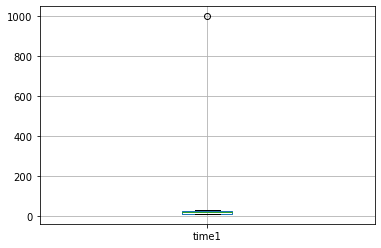

In [5]:
# Use boxplots to quickly looks for outliers
## Below all have what looks like placeholder 999 values that need to be filtered out
## behind_sec1, behind_sec3, time1, time2, time3
boxplot = runs_df.boxplot(column=['time1'])

This was confirmed with the pandas describe function. See the max values below:

In [6]:
# Look closer at outliers
runs_df[['time1','time2','time3','behind_sec1','behind_sec3']].describe()

,time1,time2,time3,behind_sec1,behind_sec3
count,79445.000000,79445.000000,79445.000000,79445.000000,79445.000000
mean,21.135480,22.929003,23.864065,3.378708,4.509426
std,6.930537,3.599769,3.571206,4.282564,16.541736
min,12.390000,19.990000,21.000000,0.150000,0.000000
25%,14.120000,22.290000,23.230000,1.500000,1.750000
50%,24.180000,22.870000,23.760000,3.000000,3.750000
75%,25.360000,23.520000,24.410000,5.000000,5.750000
max,999.000000,999.000000,999.000000,999.000000,999.000000


For this data analysis, all observations with a time value of 999 for the features contained in the table of above were removed. This reduced the number of observations from 79,445 to 79,423.

In [7]:
# Remove rows where a time value is equal to 999
runs_df = runs_df[runs_df.time1 != 999]
runs_df = runs_df[runs_df.time2 != 999]
runs_df = runs_df[runs_df.time3 != 999]
runs_df = runs_df[runs_df.behind_sec1 != 999]
runs_df = runs_df[runs_df.behind_sec3 != 999]
# source: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

The boxplot for “time1” once the observations with “999” placeholders were removed:

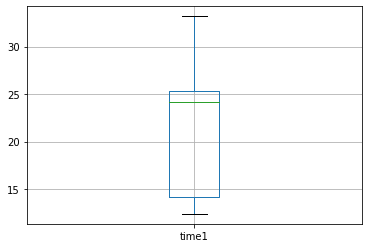

In [8]:
boxplot = runs_df.boxplot(column=['time1'])

There were no duplicates observed in the dataset.

In [9]:
# Check for duplicates
runs_df.duplicated()

race_id
0       False
0       False
0       False
0       False
0       False
        ...  
6348    False
6348    False
6348    False
6348    False
6348    False
Length: 79423, dtype: bool

## Section 4: Simple Statistics

## Section 5: Visualize Attributes

## Section 6: Explore Joint Attributes

## Section 7: Explore Attributes and Class

## Section 8: New Features

The follow is a list of potential new features to be explored in the future:

1. Show Bet Performance: Transform the “results” feature in the runs.csv file into a binary feature where placing 1, 2, or 3 becomes a 1, and all other places become a 0.
<br> <br>
2. Place Bet Performance: Transform the “results” feature in the runs.csv file into a binary feature where placing 1 or 2 becomes a 1, and all other places become a 0.
<br> <br>
3. Prize in USD: transform the “prize” column in the races.csv file from HKD to USD.
<br> <br>
4. Pace: In the races.csv file there is a distance associated with each race. We can do a merge with the runs.csv which contains the final time for each horse in each race. From there, we can calculate a new feature labeled speed or pace by using the formula . We can also calculate the pace for each split of the race if needed.

In [ ]:
#end